In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [2]:
df = pd.read_excel('Contraceptive_method_dataset.xlsx')
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [3]:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [4]:
df.rename(columns = {'Media_exposure ':'Media_exposure'}, inplace = True)

In [5]:
df.rename(columns = {'Wife_ education':'Wife_education'}, inplace = True)

In [6]:
print('Number of rows: ', df.shape[0], '\n''Number of columns: ', df.shape[1])

Number of rows:  1473 
Number of columns:  10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_education             1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [9]:
df.isnull().sum()

Wife_age                     71
Wife_education                0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [10]:
df.groupby('Wife_education')['Wife_age'].median()

Wife_education
Primary       30.0
Secondary     30.0
Tertiary      33.0
Uneducated    39.0
Name: Wife_age, dtype: float64

In [11]:
df['Wife_age'] = np.where((df['Wife_age'].isnull() & (df['Wife_education']=="Tertiary")),33, df['Wife_age'])

In [12]:
df['Wife_age'] = np.where((df['Wife_age'].isnull() & (df['Wife_education']=="Secondary")),30, df['Wife_age'])

In [13]:
df['Wife_age'] = np.where((df['Wife_age'].isnull() & (df['Wife_education']=="Primary")),30, df['Wife_age'])

In [14]:
df['Wife_age'] = np.where((df['Wife_age'].isnull() & (df['Wife_education']=="Uneducated")),39, df['Wife_age'])

In [15]:
df['Wife_age'].isnull().sum()

0

In [16]:
# df['Wife_age'] = df['Wife_age'].dropna(inplace=True)

In [17]:
# df['Wife_age'].isnull().sum()

In [18]:
# df['No_of_children_born'].median()

In [19]:
#  df['No_of_children_born'] = np.where(df['No_of_children_born'].isnull(),3, df['No_of_children_born'])

In [20]:
# df.dropna(inplace=True)

In [21]:
df.groupby('Wife_education')['No_of_children_born'].median()

Wife_education
Primary       3.0
Secondary     3.0
Tertiary      3.0
Uneducated    4.0
Name: No_of_children_born, dtype: float64

In [22]:
df['No_of_children_born'] = np.where((df['No_of_children_born'].isnull() & (df['Wife_education']=="Tertiary")),3, df['No_of_children_born'])

In [23]:
df['No_of_children_born'] = np.where((df['No_of_children_born'].isnull() & (df['Wife_education']=="Secondary")),3, df['No_of_children_born'])

In [24]:
df['No_of_children_born'] = np.where((df['No_of_children_born'].isnull() & (df['Wife_education']=="Primary")),3, df['No_of_children_born'])

In [25]:
df['No_of_children_born'] = np.where((df['No_of_children_born'].isnull() & (df['Wife_education']=="Uneducated")),4, df['No_of_children_born'])

In [26]:
df.isnull().sum()

Wife_age                     0
Wife_education               0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1473.0,32.582485,8.092797,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1473.0,3.251867,2.348617,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [28]:
df.duplicated().sum()

85

In [29]:
df[df.duplicated()]

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1442,33.0,Tertiary,Tertiary,3.0,Non-Scientology,No,2,Very High,Exposed,Yes
1447,33.0,Tertiary,Tertiary,2.0,Non-Scientology,Yes,2,Very High,Exposed,Yes
1463,30.0,Uneducated,Secondary,4.0,Scientology,No,3,Very High,Exposed,Yes
1467,29.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes


In [30]:
# I didn’t drop duplicates as there is a possibility that same age ladies has same kind of other records .

In [31]:
count1 = (df['Wife_age'] == 0).sum()
print('Count of zeros in Column  Wife_age : ', count1)
count2 = (df['No_of_children_born'] == 0).sum()
print('Count of zeros in Column  No_of_children_born : ', count2)
count3 = (df['Husband_Occupation'] == 0).sum()
print('Count of zeros in Column  Husband_Occupation : ', count3)

Count of zeros in Column  Wife_age :  0
Count of zeros in Column  No_of_children_born :  97
Count of zeros in Column  Husband_Occupation :  0


# Univariate Analysis

# Wife_age

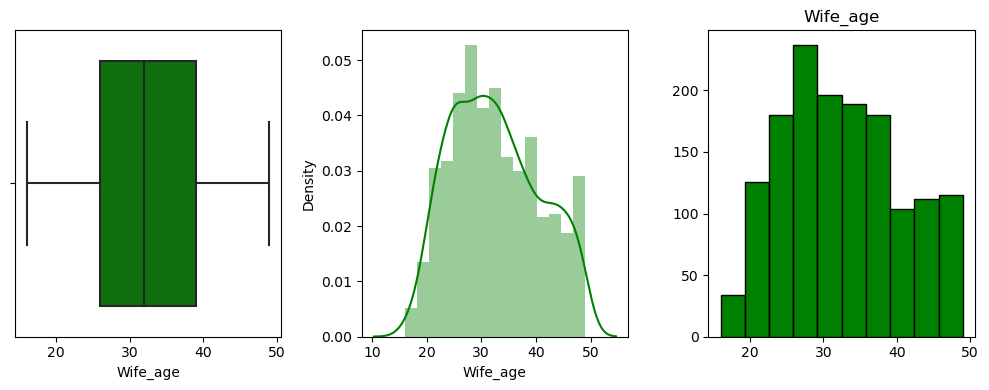

In [32]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('Wife_age')
sns.boxplot(df['Wife_age'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['Wife_age'], color='g',ax=axes[1])
df.hist(column='Wife_age', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

# No_of_children_born

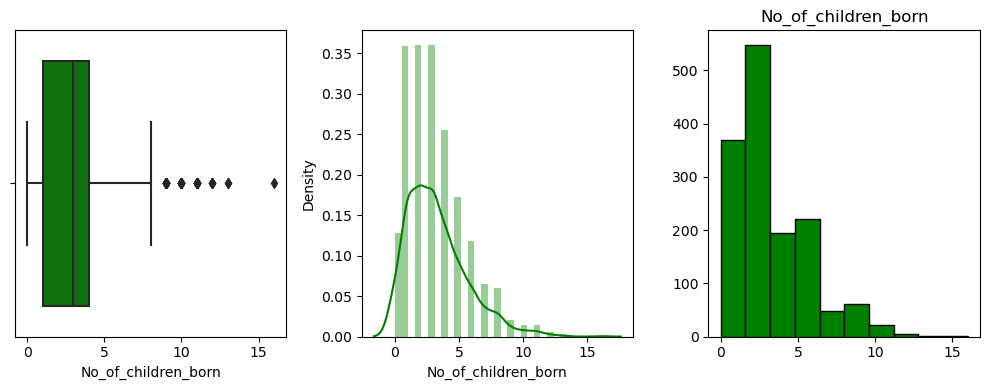

In [33]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('No_of_children_born')
sns.boxplot(df['No_of_children_born'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['No_of_children_born'], color='g',ax=axes[1])
df.hist(column='No_of_children_born', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

# Husband_Occupation

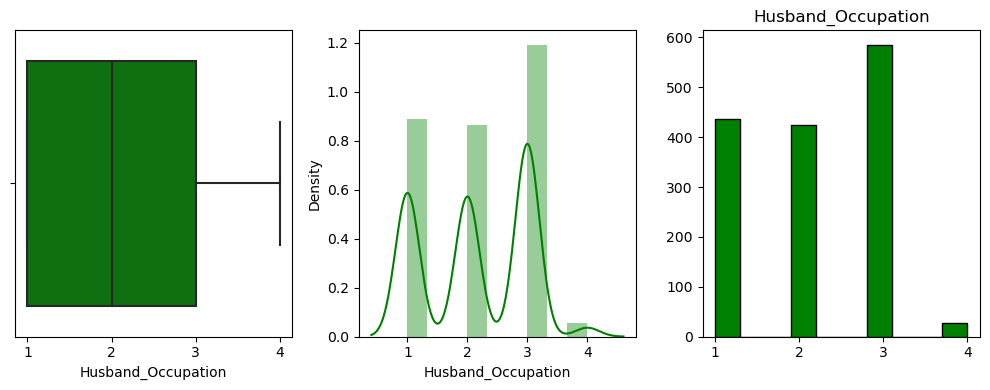

In [34]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('Husband_Occupation')
sns.boxplot(df['Husband_Occupation'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['Husband_Occupation'], color='g',ax=axes[1])
df.hist(column='Husband_Occupation', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

# Wife_education

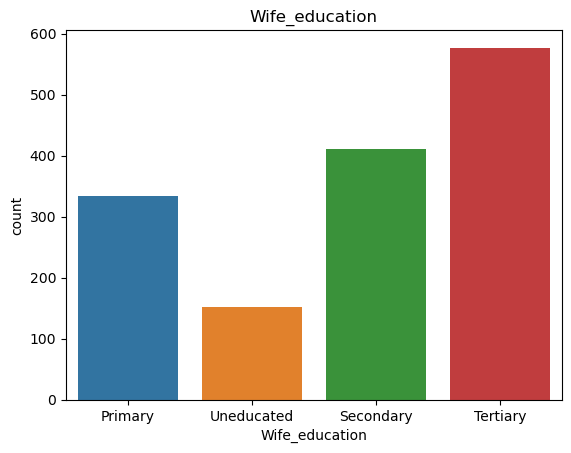

In [35]:
plt.title('Wife_education')
sns.countplot(df['Wife_education'])

# plt.subplots_adjust()
# plt.tight_layout()

plt.show()

# Husband_education

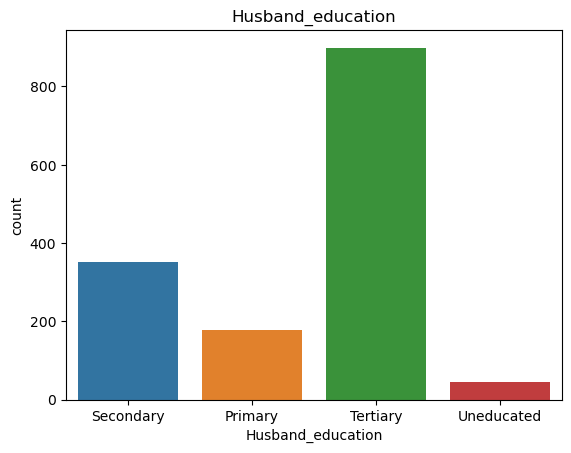

In [36]:
plt.title('Husband_education')
sns.countplot(df['Husband_education'])

# plt.subplots_adjust()
# plt.tight_layout()

plt.show()

# Wife_religion

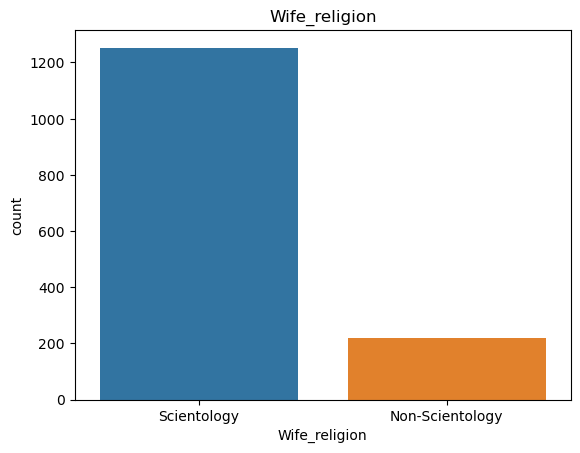

In [37]:
plt.title('Wife_religion')
sns.countplot(df['Wife_religion'])

# plt.subplots_adjust()
# plt.tight_layout()

plt.show()

# Wife_Working

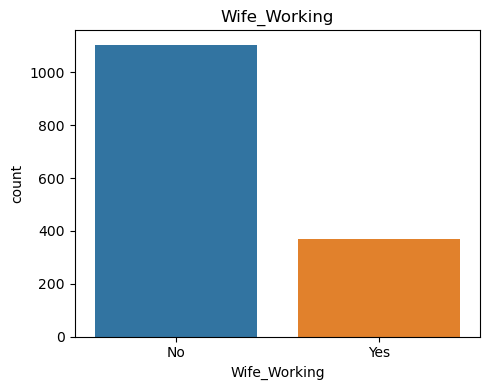

In [38]:
plt.figure(figsize=(5, 4))
plt.title('Wife_Working')
sns.countplot(df['Wife_Working'])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

# Standard_of_living_index

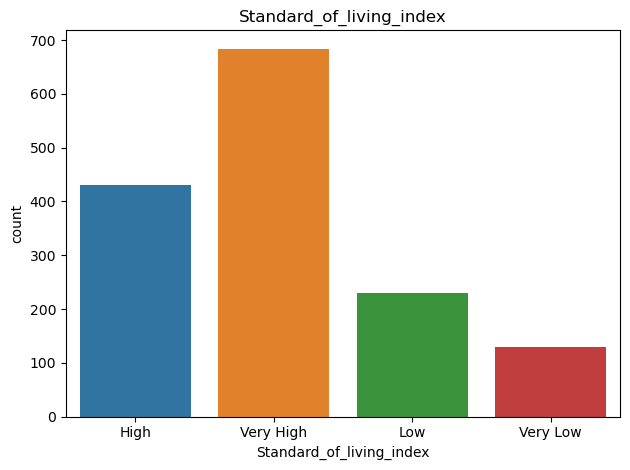

In [39]:
plt.title('Standard_of_living_index')
sns.countplot(df['Standard_of_living_index'])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

# Media_exposure

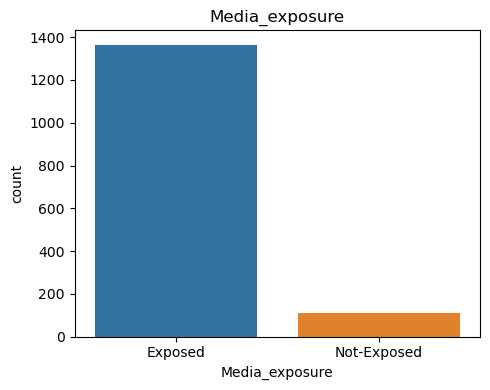

In [40]:
plt.figure(figsize=(5, 4))
plt.title('Media_exposure')
sns.countplot(df['Media_exposure'])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

# Contraceptive_method_used

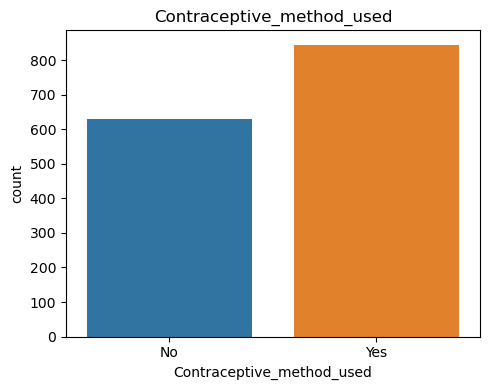

In [41]:
plt.figure(figsize=(5, 4))
plt.title('Contraceptive_method_used')
sns.countplot(df['Contraceptive_method_used'])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [42]:
df.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

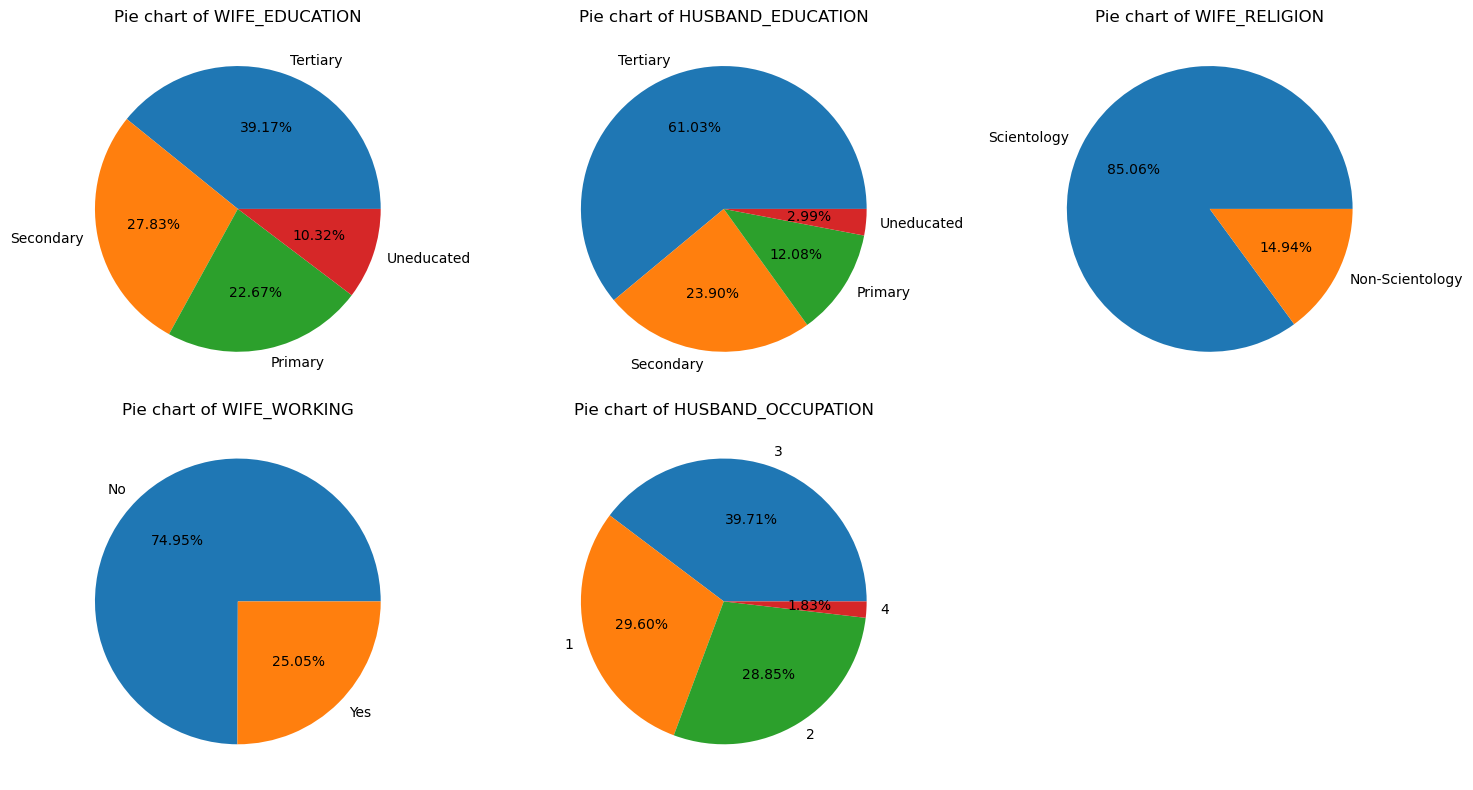

In [43]:
cat_vars = ['Wife_education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Husband_Occupation','Standard_of_living_index','Media_exposure','Contraceptive_method_used']
plt.figure(figsize = (15,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.pie(df[cat_vars[i]].value_counts(), labels = df[cat_vars[i]].value_counts().index, 
            autopct = '%0.2f%%')
    plt.title("Pie chart of "+cat_vars[i].upper())
    plt.tight_layout();

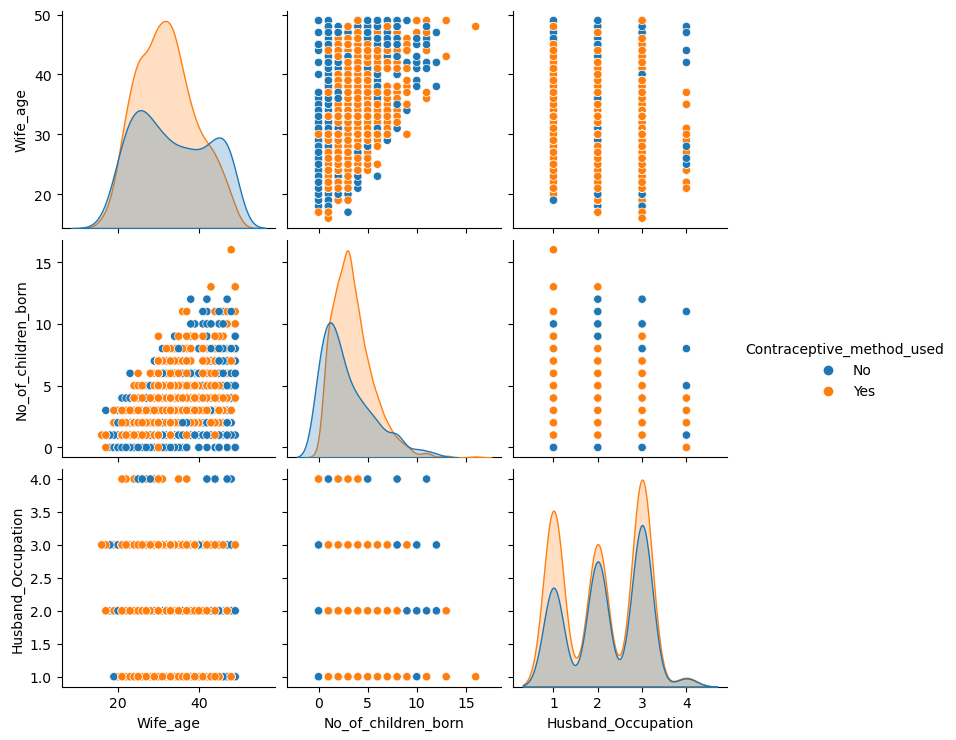

In [44]:
sns.pairplot(df,hue='Contraceptive_method_used',diag_kind='kde');

In [45]:
# which attributes are overlapping they are not good .because we can't differentiate them

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and build multiple models with different predictors.

In [46]:
df['Wife_education'].value_counts()

Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_education, dtype: int64

In [47]:
df['Wife_education'] = df['Wife_education'].replace({"Uneducated":1, "Primary":2, "Secondary":3, "Tertiary":4})
df['Wife_education'].value_counts()

4    577
3    410
2    334
1    152
Name: Wife_education, dtype: int64

In [48]:
df['Husband_education'].value_counts()

Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64

In [49]:
df['Husband_education'] = df['Husband_education'].replace({"Uneducated":1, "Primary":2, "Secondary":3, "Tertiary":4})
df['Husband_education'].value_counts()

4    899
3    352
2    178
1     44
Name: Husband_education, dtype: int64

In [50]:
df['Husband_Occupation'].value_counts()

3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64

In [51]:
df['Wife_religion'].value_counts()

Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64

In [52]:
df['Wife_Working'].value_counts()

No     1104
Yes     369
Name: Wife_Working, dtype: int64

In [53]:
df['Standard_of_living_index'].value_counts()

Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64

In [54]:
df['Standard_of_living_index'] = df['Standard_of_living_index'].replace({"Very Low":1, "Low":2, "High":3, "Very High":4})
df['Standard_of_living_index'].value_counts()

4    684
3    431
2    229
1    129
Name: Standard_of_living_index, dtype: int64

In [55]:
df['Media_exposure'].value_counts()

Exposed        1364
Not-Exposed     109
Name: Media_exposure, dtype: int64

In [56]:
df['Media_exposure'] = df['Media_exposure'].replace({'Exposed':'Good','Not-Exposed':'Not_good'})
df['Media_exposure'].value_counts()

Good        1364
Not_good     109
Name: Media_exposure, dtype: int64

In [57]:
df['Contraceptive_method_used'].value_counts()

Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64

# Dummy Variables

In [58]:
df_dummy = pd.get_dummies(df, drop_first=True)

In [59]:
df_dummy.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure_Not_good,Contraceptive_method_used_Yes
0,24.0,2,3,3.0,2,3,1,0,0,0
1,45.0,1,3,10.0,3,4,1,0,0,0
2,43.0,2,3,7.0,3,4,1,0,0,0
3,42.0,3,2,9.0,3,3,1,0,0,0
4,36.0,3,3,8.0,3,2,1,0,0,0


In [60]:
print('Number of rows: ', df_dummy.shape[0], '\n''Number of columns: ', df_dummy.shape[1])

Number of rows:  1473 
Number of columns:  10


# Build the Logistic Regression Model

In [61]:
import statsmodels.formula.api as SM

In [62]:
' + '.join(df_dummy.columns)

'Wife_age + Wife_education + Husband_education + No_of_children_born + Husband_Occupation + Standard_of_living_index + Wife_religion_Scientology + Wife_Working_Yes + Media_exposure_Not_good + Contraceptive_method_used_Yes'

# Model 1

In [63]:
f_1 = 'Contraceptive_method_used_Yes ~ Wife_age + Wife_education + Husband_education + No_of_children_born + Husband_Occupation + Standard_of_living_index + Wife_religion_Scientology + Wife_Working_Yes + Media_exposure_Not_good'

In [64]:
model_1 = SM.logit(formula=f_1,data=df_dummy).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.604507
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1473
Model:                                     Logit   Df Residuals:                     1463
Method:                                      MLE   Df Model:                            9
Date:                           Sun, 27 Nov 2022   Pseudo R-squ.:                  0.1142
Time:                                   20:32:52   Log-Likelihood:                -890.44
converged:                                  True   LL-Null:                       -1005.3
Covariance Type:                       nonrobust   LLR p-value:                 1.959e-44
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.4913      0.550     -0.894      0.372      -1.569       0.586
Wife_age                     -0.0765      0.009     -8.103      0.000      -0.095      -0.058
Wife_education                0.5499      0.080      6.904      0.000       0.394       0.706
Husband_education             0.0080      0.092      0.087      0.930      -0.173       0.189
No_of_children_born           0.3221      0.034      9.549      0.000       0.256       0.388
Husband_Occupation            0.0822      0.076      1.082      0.279      -0.067       0.231
Standard_of_living_index      0.2530      0.067      3.794      0.000       0.122       0.384
Wife_religion_Scientology    -0.3597      0.170     -2.110      0.035      -0.694      -0.026
Wife_Working_Yes             -0.1365      0.132     -1.031      0.303      -0.396       0.123
Media_exposure_Not_good      -0.4673      0.247     -1.895      0.058      -0.951       0.016
=============================================================================================
"""

In [65]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.1052663982140809


In [66]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [67]:
df_dummy.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Husband_Occupation', 'Standard_of_living_index',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Media_exposure_Not_good', 'Contraceptive_method_used_Yes'],
      dtype='object')

In [68]:
vif_cal(input_data=df_dummy[['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Husband_Occupation', 'Standard_of_living_index',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Media_exposure_Not_good']])

Wife_age  VIF =  1.58
Wife_education  VIF =  1.91
Husband_education  VIF =  1.74
No_of_children_born  VIF =  1.5
Husband_Occupation  VIF =  1.3
Standard_of_living_index  VIF =  1.31
Wife_religion_Scientology  VIF =  1.12
Wife_Working_Yes  VIF =  1.03
Media_exposure_Not_good  VIF =  1.19


# Model 2

# Model without the 'Husband_education' variable

In [69]:
f_2 = 'Contraceptive_method_used_Yes ~ Wife_age + Wife_education + No_of_children_born + Husband_Occupation + Standard_of_living_index + Wife_religion_Scientology + Wife_Working_Yes + Media_exposure_Not_good '

In [70]:
model_2 = SM.logit(formula=f_2,data=df_dummy).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.604510
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1473
Model:                                     Logit   Df Residuals:                     1464
Method:                                      MLE   Df Model:                            8
Date:                           Sun, 27 Nov 2022   Pseudo R-squ.:                  0.1142
Time:                                   20:32:52   Log-Likelihood:                -890.44
converged:                                  True   LL-Null:                       -1005.3
Covariance Type:                       nonrobust   LLR p-value:                 3.542e-45
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.4721      0.504     -0.937      0.349      -1.460       0.516
Wife_age                     -0.0765      0.009     -8.107      0.000      -0.095      -0.058
Wife_education                0.5531      0.071      7.770      0.000       0.414       0.693
No_of_children_born           0.3219      0.034      9.568      0.000       0.256       0.388
Husband_Occupation            0.0814      0.075      1.079      0.280      -0.066       0.229
Standard_of_living_index      0.2539      0.066      3.857      0.000       0.125       0.383
Wife_religion_Scientology    -0.3602      0.170     -2.114      0.034      -0.694      -0.026
Wife_Working_Yes             -0.1372      0.132     -1.038      0.299      -0.396       0.122
Media_exposure_Not_good      -0.4690      0.246     -1.908      0.056      -0.951       0.013
=============================================================================================
"""

In [71]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.10625738055674705


# Model 3

# Model without the 'Wife_Working_Yes' variable

In [72]:
f_3 = 'Contraceptive_method_used_Yes ~ Wife_age + Wife_education + No_of_children_born + Husband_Occupation + Standard_of_living_index + Wife_religion_Scientology + Media_exposure_Not_good '

In [73]:
model_3 = SM.logit(formula=f_3,data=df_dummy).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.604875
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1473
Model:                                     Logit   Df Residuals:                     1465
Method:                                      MLE   Df Model:                            7
Date:                           Sun, 27 Nov 2022   Pseudo R-squ.:                  0.1137
Time:                                   20:32:52   Log-Likelihood:                -890.98
converged:                                  True   LL-Null:                       -1005.3
Covariance Type:                       nonrobust   LLR p-value:                 1.005e-45
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.4736      0.504     -0.940      0.347      -1.461       0.514
Wife_age                     -0.0772      0.009     -8.209      0.000      -0.096      -0.059
Wife_education                0.5504      0.071      7.745      0.000       0.411       0.690
No_of_children_born           0.3256      0.033      9.726      0.000       0.260       0.391
Husband_Occupation            0.0793      0.075      1.053      0.292      -0.068       0.227
Standard_of_living_index      0.2501      0.066      3.808      0.000       0.121       0.379
Wife_religion_Scientology    -0.3565      0.170     -2.093      0.036      -0.690      -0.023
Media_exposure_Not_good      -0.4794      0.246     -1.950      0.051      -0.961       0.003
=============================================================================================
"""

In [74]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.10671730193287454


# Model 4

# Model without the 'Husband_Occupation' variable

In [75]:
f_4 = 'Contraceptive_method_used_Yes ~ Wife_age + Wife_education + No_of_children_born + Standard_of_living_index + Wife_religion_Scientology + Media_exposure_Not_good '

In [76]:
model_4 = SM.logit(formula=f_4,data=df_dummy).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.605252
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1473
Model:                                     Logit   Df Residuals:                     1466
Method:                                      MLE   Df Model:                            6
Date:                           Sun, 27 Nov 2022   Pseudo R-squ.:                  0.1131
Time:                                   20:32:52   Log-Likelihood:                -891.54
converged:                                  True   LL-Null:                       -1005.3
Covariance Type:                       nonrobust   LLR p-value:                 2.686e-46
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.1317      0.385     -0.342      0.732      -0.886       0.623
Wife_age                     -0.0788      0.009     -8.487      0.000      -0.097      -0.061
Wife_education                0.5243      0.066      7.898      0.000       0.394       0.654
No_of_children_born           0.3257      0.033      9.737      0.000       0.260       0.391
Standard_of_living_index      0.2398      0.065      3.695      0.000       0.113       0.367
Wife_religion_Scientology    -0.3692      0.170     -2.170      0.030      -0.703      -0.036
Media_exposure_Not_good      -0.4854      0.246     -1.973      0.048      -0.967      -0.003
=============================================================================================
"""

In [77]:
print('The adjusted pseudo R-square value is',1 - ((model_4.llf - model_4.df_model)/model_4.llnull))

The adjusted pseudo R-square value is 0.10715920760875286


We notice that the adjusted pseudo R-squared values have increased.

'p values' indicate that all variables are significant at 95% confidence level

# Prediction on the Data

Now, let us see the predicted probability values.

There are probabilities of an individual going to Default

In [78]:
y_prob_pred_4 = model_4.predict()
print(y_prob_pred_4)

[0.58727374 0.6666698  0.59817818 ... 0.48363012 0.48195512 0.73440996]


<AxesSubplot:xlabel='Contraceptive_method_used_Yes'>

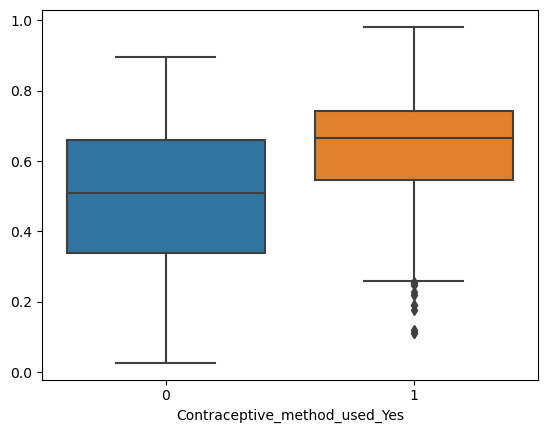

In [79]:
sns.boxplot(x=df_dummy['Contraceptive_method_used_Yes'],y=y_prob_pred_4)

From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable power of the model. Let us take a cut-off of 0.5 first and check.

Let us now see the predicted classes

In [80]:
y_class_pred_4=(y_prob_pred_4>=0.5).astype(int)
y_class_pred_4
# whereever the probability is greater than 

array([1, 1, 1, ..., 0, 0, 1])

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

# Model  Evaluation on the Data

In [81]:
from sklearn import metrics

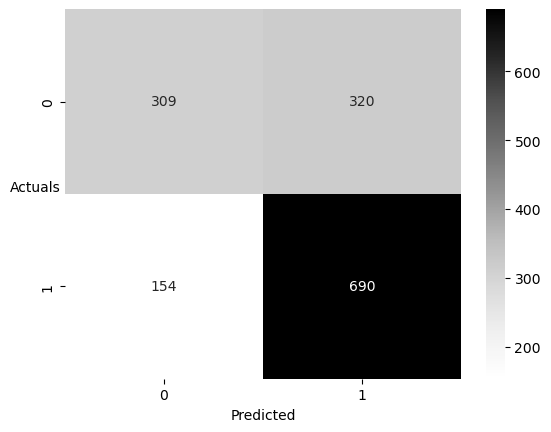

In [82]:
sns.heatmap((metrics.confusion_matrix(df_dummy['Contraceptive_method_used_Yes'],y_class_pred_4)),annot=True,fmt='.5g'
            ,cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Actuals',rotation=0);

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_estimator()

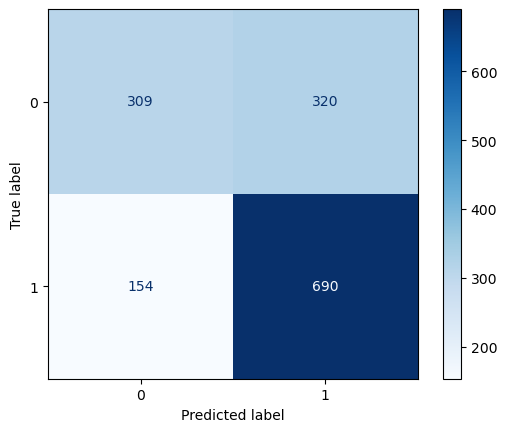

In [84]:
metrics.ConfusionMatrixDisplay.from_predictions(df_dummy['Contraceptive_method_used_Yes'],y_class_pred_4, cmap='Blues')

In [85]:
tn, fp, fn, tp = metrics.confusion_matrix(df_dummy['Contraceptive_method_used_Yes'],y_class_pred_4).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 309 
False Positives: 320 
False Negatives: 154 
True Positives: 690


In [86]:
print(metrics.classification_report(df_dummy['Contraceptive_method_used_Yes'],y_class_pred_4,digits=3))

              precision    recall  f1-score   support

           0      0.667     0.491     0.566       629
           1      0.683     0.818     0.744       844

    accuracy                          0.678      1473
   macro avg      0.675     0.654     0.655      1473
weighted avg      0.676     0.678     0.668      1473



In [87]:
# recall or sensitivity come 81.8%

In [88]:
metrics.accuracy_score(df_dummy['Contraceptive_method_used_Yes'],y_class_pred_4)

0.6782077393075356

In [89]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    y_class_pred_custom_cutoff=(y_prob_pred_4>=custom_prob).astype(int)
    y_class_pred_custom_cutoff
   
    print(round(j,3),metrics.accuracy_score(df_dummy['Contraceptive_method_used_Yes'],y_class_pred_custom_cutoff))

0.1 0.5879158180583842
0.2 0.6130346232179226
0.3 0.6517311608961304
0.4 0.6646300067888663
0.5 0.6782077393075356
0.6 0.6564833672776647
0.7 0.581805838424983
0.8 0.4650373387644263
0.9 0.43380855397148677


In [90]:
cut_off = 0.3
y_class_pred_custom_cutoff=(y_prob_pred_4 >= cut_off).astype(int)
#y_class_pred_custom_cutoff

True Negative: 135 
False Positives: 494 
False Negatives: 19 
True Positives: 825
              precision    recall  f1-score   support

           0      0.877     0.215     0.345       629
           1      0.625     0.977     0.763       844

    accuracy                          0.652      1473
   macro avg      0.751     0.596     0.554      1473
weighted avg      0.733     0.652     0.584      1473



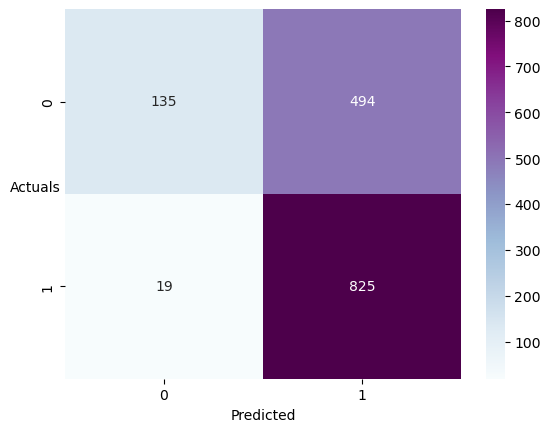

In [91]:
sns.heatmap((metrics.confusion_matrix(df_dummy['Contraceptive_method_used_Yes'],y_class_pred_custom_cutoff)),annot=True,fmt='.5g'
            ,cmap='BuPu');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

tn, fp, fn, tp = metrics.confusion_matrix(df_dummy['Contraceptive_method_used_Yes'],y_class_pred_custom_cutoff).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

print(metrics.classification_report(df_dummy['Contraceptive_method_used_Yes'],y_class_pred_custom_cutoff,digits=3))

# Model building with sklearn

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
Train,Test = train_test_split(df_dummy,test_size=0.3,random_state=10,stratify=df_dummy['Contraceptive_method_used_Yes'])

In [94]:
print(Train.shape)
print(Test.shape)

(1031, 10)
(442, 10)


In [95]:
print(Train['Contraceptive_method_used_Yes'].value_counts(1),'\n')
print(Test['Contraceptive_method_used_Yes'].value_counts(1))

1    0.57323
0    0.42677
Name: Contraceptive_method_used_Yes, dtype: float64 

1    0.572398
0    0.427602
Name: Contraceptive_method_used_Yes, dtype: float64


In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lr = LogisticRegression(penalty='none',solver='newton-cg')

In [98]:
model_sklearn_4 = lr.fit(Train[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index',
                            'Wife_religion_Scientology','Media_exposure_Not_good']],Train['Contraceptive_method_used_Yes'])
model_sklearn_4

LogisticRegression(penalty='none', solver='newton-cg')

In [99]:
model_sklearn_4_pred_train = model_sklearn_4.predict(Train[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index',
                            'Wife_religion_Scientology','Media_exposure_Not_good']])
print(model_sklearn_4_pred_train)

[0 1 1 ... 0 0 0]


In [100]:
model_sklearn_4_pred_test = model_sklearn_4.predict(Test[['Wife_age','Wife_education','No_of_children_born','Standard_of_living_index',
                            'Wife_religion_Scientology','Media_exposure_Not_good']])
print(model_sklearn_4_pred_test)

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0
 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0
 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1]


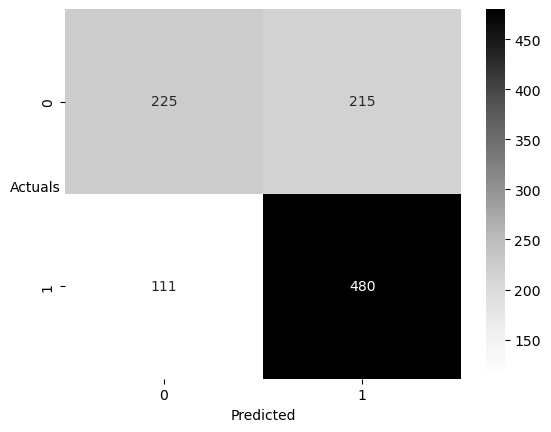

In [101]:
sns.heatmap((metrics.confusion_matrix(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train)),annot=True,fmt='.5g'
            ,cmap='Greys');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [102]:
print(metrics.classification_report(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.670     0.511     0.580       440
           1      0.691     0.812     0.747       591

    accuracy                          0.684      1031
   macro avg      0.680     0.662     0.663      1031
weighted avg      0.682     0.684     0.675      1031



In [103]:
print(metrics.classification_report(Test['Contraceptive_method_used_Yes'],model_sklearn_4_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.630     0.460     0.532       189
           1      0.664     0.798     0.725       253

    accuracy                          0.654       442
   macro avg      0.647     0.629     0.629       442
weighted avg      0.650     0.654     0.643       442



Text(0.5, 1.0, 'Test\xa0Data')

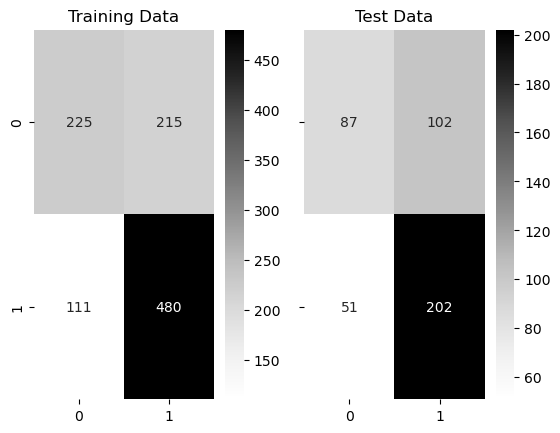

In [104]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True)

#Plotting confusion matrix for the different models for the Training Data

plot_00 = sns.heatmap((metrics.confusion_matrix(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0]);
a[0].set_title('Training Data')


#Plotting confusion matrix for the different models for the Test Data


plot_01 = sns.heatmap((metrics.confusion_matrix(Test['Contraceptive_method_used_Yes'],model_sklearn_4_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[1]);
a[1].set_title('Test Data')

In [105]:
print('Accuracy Score - Model 4')
print('Training:', metrics.accuracy_score(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train))
print('Testing: ', metrics.accuracy_score(Test['Contraceptive_method_used_Yes'],model_sklearn_4_pred_test))

Accuracy Score - Model 4
Training: 0.6838021338506305
Testing:  0.6538461538461539


AUC: 0.662


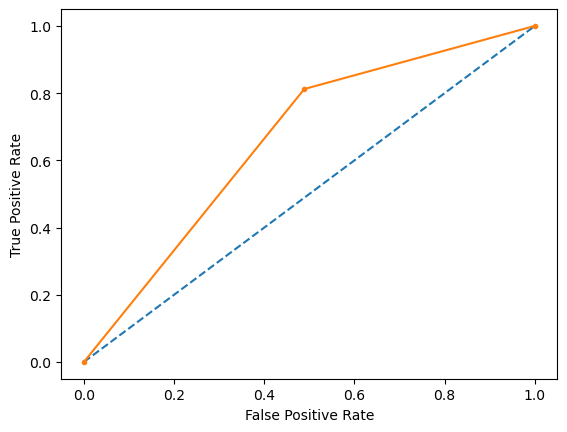

In [106]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Train['Contraceptive_method_used_Yes'],model_sklearn_4_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

AUC: 0.629


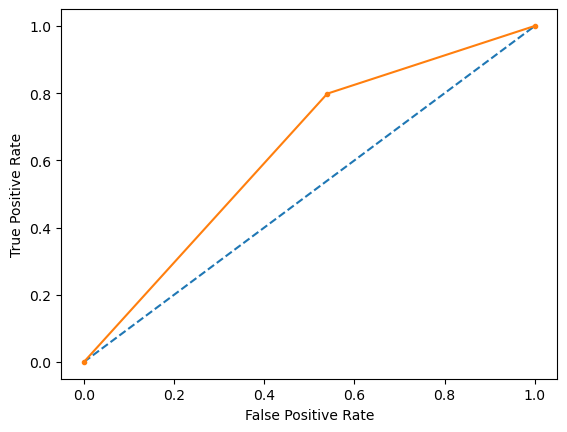

In [107]:
# AUC and ROC for the testing data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Contraceptive_method_used_Yes'],model_sklearn_4_pred_test)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Contraceptive_method_used_Yes'],model_sklearn_4_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()